In [17]:
# Import Libraries:
from datetime import datetime, timedelta # Datetime Feature
import pandas as pd # Import Pandas
# import pandas_ta as ta
import panel as pn # Import Panel
import numpy as np 
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension
import matplotlib.pyplot as plt
from pprint import pprint
import requests # To fetch data from our url API
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Import and initialize coinmetrics API (in this case `cm` for the Coinmetrics Community API)
#import coinmetrics # Coinmetrics API
#cm = coinmetrics.Community()


Bad key savefig.frameon in file /Users/brianwetzel/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/brianwetzel/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/brianwetzel/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  #

In [24]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=365)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()

# API OUTPUT (Coinmetrics Community URL API)
asset_data_df = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
print(asset_data_df)


{'data': [{'market': 'coinbase-btc-usd-spot', 'time': '2020-11-19T00:00:00.000000000Z', 'price_open': '17790.18', 'price_close': '17821.58', 'price_high': '18193.29', 'price_low': '17356', 'vwap': '17863.17584359962', 'volume': '17141.49267548', 'candle_usd_volume': '306201497.883874238933068494524085', 'candle_trades_count': '138652'}, {'market': 'coinbase-btc-usd-spot', 'time': '2020-11-20T00:00:00.000000000Z', 'price_open': '17821.92', 'price_close': '18675.25', 'price_high': '18830.3', 'price_low': '17764.76', 'vwap': '18406.84191443754', 'volume': '17901.931678', 'candle_usd_volume': '329518026.3600075277954300999853', 'candle_trades_count': '152563'}, {'market': 'coinbase-btc-usd-spot', 'time': '2020-11-21T00:00:00.000000000Z', 'price_open': '18677.84', 'price_close': '18721.21', 'price_high': '18980', 'price_low': '18350', 'vwap': '18733.99314627924', 'volume': '13604.27139959', 'candle_usd_volume': '254862327.160041732090799468704087', 'candle_trades_count': '143886'}, {'market

In [25]:
def btc(symbol, start_date = None):
    api_key = open(r'api_key.txt')
    df = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
# pprint(asset_data)
    df = pd.DataFrame(raw_df[f'Time Series (Daily)']).T
    df = df.rename(columns = {'1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. adjusted close': 'adj close', '6. volume': 'volume'})
    for i in df.columns:
        df[i] = df[i].astype(float)
    df.index = pd.to_datetime(df.index)
    df = df.iloc[::-1].drop(['7. dividend amount', '8. split coefficient'], axis = 1)
    if start_date:
        df = df[df.index >= start_date]
    return df


In [22]:
asset_data_rolling_30day = asset_data_df['close'].rolling(window=30).mean()
print(asset_data_rolling_30day)

KeyError: 'close'

In [17]:
print(asset_data)

{'data': [{'market': 'coinbase-btc-usd-spot', 'time': '2020-11-20T00:00:00.000000000Z', 'price_open': '17821.92', 'price_close': '18675.25', 'price_high': '18830.3', 'price_low': '17764.76', 'vwap': '18406.84191443754', 'volume': '17901.931678', 'candle_usd_volume': '329518026.3600075277954300999853', 'candle_trades_count': '152563'}, {'market': 'coinbase-btc-usd-spot', 'time': '2020-11-21T00:00:00.000000000Z', 'price_open': '18677.84', 'price_close': '18721.21', 'price_high': '18980', 'price_low': '18350', 'vwap': '18733.99314627924', 'volume': '13604.27139959', 'candle_usd_volume': '254862327.160041732090799468704087', 'candle_trades_count': '143886'}, {'market': 'coinbase-btc-usd-spot', 'time': '2020-11-22T00:00:00.000000000Z', 'price_open': '18721.21', 'price_close': '18437.66', 'price_high': '18773.56', 'price_low': '17610.77', 'vwap': '18365.40920633928', 'volume': '15423.83816127', 'candle_usd_volume': '283265099.364075118072560410113008', 'candle_trades_count': '141941'}, {'mar

In [18]:
 macd_data = asset_data_df

In [19]:
macd_data = macd_data.set_index(pd.DatetimeIndex(macd_data['date'].values))

In [20]:
macd_data

,date,open,close,high,low,volume,vwap
2020-11-20 00:00:00+00:00,2020-11-20T00:00:00.000000000Z,"17,821.92","18,675.25","18,830.30","17,764.76","17,901.93","18,406.84"
2020-11-21 00:00:00+00:00,2020-11-21T00:00:00.000000000Z,"18,677.84","18,721.21","18,980.00","18,350.00","13,604.27","18,733.99"
2020-11-22 00:00:00+00:00,2020-11-22T00:00:00.000000000Z,"18,721.21","18,437.66","18,773.56","17,610.77","15,423.84","18,365.41"
2020-11-23 00:00:00+00:00,2020-11-23T00:00:00.000000000Z,"18,437.18","18,384.82","18,777.77","18,001.00","17,655.66","18,413.15"
2020-11-24 00:00:00+00:00,2020-11-24T00:00:00.000000000Z,"18,384.82","19,172.84","19,469.00","18,052.02","26,622.85","18,966.00"
...,...,...,...,...,...,...,...
2021-02-23 00:00:00+00:00,2021-02-23T00:00:00.000000000Z,"54,125.67","48,899.99","54,206.22","44,888.08","72,300.59","48,389.10"
2021-02-24 00:00:00+00:00,2021-02-24T00:00:00.000000000Z,"48,899.99","49,737.82","51,415.41","47,002.00","30,732.15","49,689.56"
2021-02-25 00:00:00+00:00,2021-02-25T00:00:00.000000000Z,"49,737.81","47,063.56","52,107.83","46,700.00","28,011.20","49,751.66"
2021-02-26 00:00:00+00:00,2021-02-26T00:00:00.000000000Z,"47,052.15","46,326.20","48,464.64","44,150.00","36,048.62","46,562.87"


In [21]:
macd_data = macd_data.set_index(pd.DatetimeIndex(macd_data['date'].values))

In [22]:
DataFrame = macd_data

In [23]:
df = DataFrame

In [24]:
print(df)

                                                     date      open     close  \
2020-11-20 00:00:00+00:00  2020-11-20T00:00:00.000000000Z 17,821.92 18,675.25   
2020-11-21 00:00:00+00:00  2020-11-21T00:00:00.000000000Z 18,677.84 18,721.21   
2020-11-22 00:00:00+00:00  2020-11-22T00:00:00.000000000Z 18,721.21 18,437.66   
2020-11-23 00:00:00+00:00  2020-11-23T00:00:00.000000000Z 18,437.18 18,384.82   
2020-11-24 00:00:00+00:00  2020-11-24T00:00:00.000000000Z 18,384.82 19,172.84   
...                                                   ...       ...       ...   
2021-02-23 00:00:00+00:00  2021-02-23T00:00:00.000000000Z 54,125.67 48,899.99   
2021-02-24 00:00:00+00:00  2021-02-24T00:00:00.000000000Z 48,899.99 49,737.82   
2021-02-25 00:00:00+00:00  2021-02-25T00:00:00.000000000Z 49,737.81 47,063.56   
2021-02-26 00:00:00+00:00  2021-02-26T00:00:00.000000000Z 47,052.15 46,326.20   
2021-02-27 00:00:00+00:00  2021-02-27T00:00:00.000000000Z 46,319.79 46,180.75   

                           

In [25]:
df.mean()

open     31,846.45
close    32,130.78
high     33,208.41
low      30,422.44
volume   27,184.36
vwap     31,906.36
dtype: float64

In [26]:
df.corr()

,open,close,high,low,volume,vwap
open,1.00,0.99,0.99,0.99,0.29,0.99
close,0.99,1.00,1.00,0.99,0.27,1.00
high,0.99,1.00,1.00,0.99,0.32,1.00
low,0.99,0.99,0.99,1.00,0.20,1.00
volume,0.29,0.27,0.32,0.20,1.00,0.26
vwap,0.99,1.00,1.00,1.00,0.26,1.00


In [27]:
df.max

<bound method NDFrame._add_numeric_operations.<locals>.max of                                                      date      open     close  \
2020-11-20 00:00:00+00:00  2020-11-20T00:00:00.000000000Z 17,821.92 18,675.25   
2020-11-21 00:00:00+00:00  2020-11-21T00:00:00.000000000Z 18,677.84 18,721.21   
2020-11-22 00:00:00+00:00  2020-11-22T00:00:00.000000000Z 18,721.21 18,437.66   
2020-11-23 00:00:00+00:00  2020-11-23T00:00:00.000000000Z 18,437.18 18,384.82   
2020-11-24 00:00:00+00:00  2020-11-24T00:00:00.000000000Z 18,384.82 19,172.84   
...                                                   ...       ...       ...   
2021-02-23 00:00:00+00:00  2021-02-23T00:00:00.000000000Z 54,125.67 48,899.99   
2021-02-24 00:00:00+00:00  2021-02-24T00:00:00.000000000Z 48,899.99 49,737.82   
2021-02-25 00:00:00+00:00  2021-02-25T00:00:00.000000000Z 49,737.81 47,063.56   
2021-02-26 00:00:00+00:00  2021-02-26T00:00:00.000000000Z 47,052.15 46,326.20   
2021-02-27 00:00:00+00:00  2021-02-27T00:00:00.

In [28]:
df.min

<bound method NDFrame._add_numeric_operations.<locals>.min of                                                      date      open     close  \
2020-11-20 00:00:00+00:00  2020-11-20T00:00:00.000000000Z 17,821.92 18,675.25   
2020-11-21 00:00:00+00:00  2020-11-21T00:00:00.000000000Z 18,677.84 18,721.21   
2020-11-22 00:00:00+00:00  2020-11-22T00:00:00.000000000Z 18,721.21 18,437.66   
2020-11-23 00:00:00+00:00  2020-11-23T00:00:00.000000000Z 18,437.18 18,384.82   
2020-11-24 00:00:00+00:00  2020-11-24T00:00:00.000000000Z 18,384.82 19,172.84   
...                                                   ...       ...       ...   
2021-02-23 00:00:00+00:00  2021-02-23T00:00:00.000000000Z 54,125.67 48,899.99   
2021-02-24 00:00:00+00:00  2021-02-24T00:00:00.000000000Z 48,899.99 49,737.82   
2021-02-25 00:00:00+00:00  2021-02-25T00:00:00.000000000Z 49,737.81 47,063.56   
2021-02-26 00:00:00+00:00  2021-02-26T00:00:00.000000000Z 47,052.15 46,326.20   
2021-02-27 00:00:00+00:00  2021-02-27T00:00:00.

In [29]:
df.min

<bound method NDFrame._add_numeric_operations.<locals>.min of                                                      date      open     close  \
2020-11-20 00:00:00+00:00  2020-11-20T00:00:00.000000000Z 17,821.92 18,675.25   
2020-11-21 00:00:00+00:00  2020-11-21T00:00:00.000000000Z 18,677.84 18,721.21   
2020-11-22 00:00:00+00:00  2020-11-22T00:00:00.000000000Z 18,721.21 18,437.66   
2020-11-23 00:00:00+00:00  2020-11-23T00:00:00.000000000Z 18,437.18 18,384.82   
2020-11-24 00:00:00+00:00  2020-11-24T00:00:00.000000000Z 18,384.82 19,172.84   
...                                                   ...       ...       ...   
2021-02-23 00:00:00+00:00  2021-02-23T00:00:00.000000000Z 54,125.67 48,899.99   
2021-02-24 00:00:00+00:00  2021-02-24T00:00:00.000000000Z 48,899.99 49,737.82   
2021-02-25 00:00:00+00:00  2021-02-25T00:00:00.000000000Z 49,737.81 47,063.56   
2021-02-26 00:00:00+00:00  2021-02-26T00:00:00.000000000Z 47,052.15 46,326.20   
2021-02-27 00:00:00+00:00  2021-02-27T00:00:00.

In [30]:
df.median()

open     32,276.85
close    32,399.69
high     33,933.50
low      30,055.50
volume   23,193.59
vwap     32,075.96
dtype: float64

In [31]:
df.std()

open     11,309.37
close    11,310.93
high     11,844.73
low      10,571.21
volume   15,528.10
vwap     11,249.21
dtype: float64

In [36]:
pd.isnull('TRUE')

False

In [39]:
df.dropna()

,date,open,close,high,low,volume,vwap
2020-11-20 00:00:00+00:00,2020-11-20T00:00:00.000000000Z,"17,821.92","18,675.25","18,830.30","17,764.76","17,901.93","18,406.84"
2020-11-21 00:00:00+00:00,2020-11-21T00:00:00.000000000Z,"18,677.84","18,721.21","18,980.00","18,350.00","13,604.27","18,733.99"
2020-11-22 00:00:00+00:00,2020-11-22T00:00:00.000000000Z,"18,721.21","18,437.66","18,773.56","17,610.77","15,423.84","18,365.41"
2020-11-23 00:00:00+00:00,2020-11-23T00:00:00.000000000Z,"18,437.18","18,384.82","18,777.77","18,001.00","17,655.66","18,413.15"
2020-11-24 00:00:00+00:00,2020-11-24T00:00:00.000000000Z,"18,384.82","19,172.84","19,469.00","18,052.02","26,622.85","18,966.00"
...,...,...,...,...,...,...,...
2021-02-23 00:00:00+00:00,2021-02-23T00:00:00.000000000Z,"54,125.67","48,899.99","54,206.22","44,888.08","72,300.59","48,389.10"
2021-02-24 00:00:00+00:00,2021-02-24T00:00:00.000000000Z,"48,899.99","49,737.82","51,415.41","47,002.00","30,732.15","49,689.56"
2021-02-25 00:00:00+00:00,2021-02-25T00:00:00.000000000Z,"49,737.81","47,063.56","52,107.83","46,700.00","28,011.20","49,751.66"
2021-02-26 00:00:00+00:00,2021-02-26T00:00:00.000000000Z,"47,052.15","46,326.20","48,464.64","44,150.00","36,048.62","46,562.87"


In [41]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

btc_macd = get_macd(df['close'], 26, 12, 9)
btc_macd.tail()

,macd,signal,hist
2021-02-23 00:00:00+00:00,"4,553.07","4,505.49",47.59
2021-02-24 00:00:00+00:00,"4,117.70","4,427.93",-310.23
2021-02-25 00:00:00+00:00,"3,516.35","4,245.61",-729.27
2021-02-26 00:00:00+00:00,"2,946.31","3,985.75","-1,039.45"
2021-02-27 00:00:00+00:00,"2,454.51","3,679.50","-1,224.99"


In [1]:
# calculated MACD components

def plot_macd(prices, macd, signal, hist):
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')

plot_macd(df['close'], btc_macd['macd'], btc_macd['signal'], btc_macd['hist'])

NameError: name 'df' is not defined

In [49]:
# Creating out trading stragegy

def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(df['close'], btc_macd)

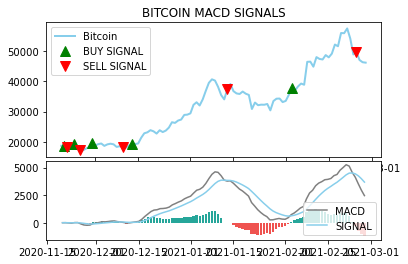

In [46]:
# Creating our trading list

ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(df['close'], color = 'skyblue', linewidth = 2, label = 'Bitcoin')
ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('BITCOIN MACD SIGNALS')
ax2.plot(btc_macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(btc_macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(btc_macd)):
    if str(btc_macd['hist'][i])[0] == '-':
        ax2.bar(btc_macd.index[i], btc_macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(btc_macd.index[i], btc_macd['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [50]:
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
macd = btc_macd['macd']
signal = btc_macd['signal']
close_price = df['close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,close,macd,signal,macd_signal,macd_position
2020-11-20 00:00:00+00:00,"18,675.25",0.00,0.00,0,1
2020-11-21 00:00:00+00:00,"18,721.21",3.67,0.73,1,1
2020-11-22 00:00:00+00:00,"18,437.66",-16.12,-2.64,-1,0
2020-11-23 00:00:00+00:00,"18,384.82",-35.66,-9.24,0,0
2020-11-24 00:00:00+00:00,"19,172.84",12.31,-4.93,1,1
...,...,...,...,...,...
2021-02-23 00:00:00+00:00,"48,899.99","4,553.07","4,505.49",0,1
2021-02-24 00:00:00+00:00,"49,737.82","4,117.70","4,427.93",-1,0
2021-02-25 00:00:00+00:00,"47,063.56","3,516.35","4,245.61",0,0
2021-02-26 00:00:00+00:00,"46,326.20","2,946.31","3,985.75",0,0


In [51]:
btc_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(btc_ret)):
    try:
        returns = btc_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/df['close'][0])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print(cl('Profit gained from the MACD strategy by investing $100k in Bitcoin : {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

NameError: name 'floor' is not defined

In [ ]:
def get_benchmark(start_date, investment_value):
    spy = get_asset_data_df('SPY', start_date)['close']
    benchmark = pd.DataFrame(np.diff(spy)).rename(columns = {0:'benchmark_returns'})
    
    investment_value = investment_value
    number_of_stocks = floor(investment_value/spy[0)
    benchmark_investment_ret = []
    
    for i in range(len(benchmark['benchmark_returns'])):
        returns = number_of_stocks*benchmark['benchmark_returns'][i]
        benchmark_investment_ret.append(returns)

    benchmark_investment_ret_df = pd.DataFrame(benchmark_investment_ret).rename(columns = {0:'investment_returns'})
    return benchmark_investment_ret_df

benchmark = get_benchmark('2020-01-01', 100000)

investment_value = 100000
total_benchmark_investment_ret = round(sum(benchmark['investment_returns']), 2)
benchmark_profit_percentage = floor((total_benchmark_investment_ret/investment_value)*100)
print(cl('Benchmark profit by investing $100k : {}'.format(total_benchmark_investment_ret), attrs = ['bold']))
print(cl('Benchmark Profit percentage : {}%'.format(benchmark_profit_percentage), attrs = ['bold']))
print(cl('MACD Strategy profit is {}% higher than the Benchmark Profit'.format(profit_percentage - benchmark_profit_percentage), attrs = ['bold']))
view rawspyetf_comparison.py hosted with ❤ by GitHub